In [ ]:
# Install the python version
!apt-get install python3.7

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3.7 is already the newest version (3.7.10-1+bionic2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


In [ ]:
# Select the version
!python3.7 setup.py

python3.7: can't open file 'setup.py': [Errno 2] No such file or directory


In [ ]:
!pip install neuralcoref
#!pip install spacy
#python3 -m spacy download en_core_web_lg

     |████████████████████████████████| 286kB 4.9MB/s 
     |████████████████████████████████| 133kB 8.8MB/s 
     |████████████████████████████████| 7.5MB 9.2MB/s 
     |████████████████████████████████| 81kB 6.7MB/s 
ERROR: botocore 1.20.64 has requirement urllib3<1.27,>=1.25.4, but you'll have urllib3 1.24.3 which is incompatible.


In [ ]:
#!pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.2.0/en_core_web_sm-2.2.0.tar.gz

In [ ]:
!pip install spacy==2.1.0

  Using cached https://files.pythonhosted.org/packages/78/0f/ca790def675011f25bce8775cf9002b5085cd2288f85e891f70b32c18752/spacy-2.1.0-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/fa/5f/47b7b29ad202b2210020e2f33bfb06d1db2abe0e709c2a84736e8a9d1bd5/blis-0.2.4-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/bc/2b/3ecd5d90d2d6fd39fbc520de7d80db5d74defdc2d7c2e15531d9cc3498c7/preshed-2.0.1-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/36/42/d7ea7539af3852fd8c1f0b3adf4a100fb3d72b40b69cef1a764ff979a743/thinc-7.0.8-cp37-cp37m-manylinux1_x86_64.whl
     |████████████████████████████████| 184kB 5.3MB/s 
ERROR: en-core-web-sm 3.0.0 has requirement spacy<3.1.0,>=3.0.0, but you'll have spacy 2.1.0 which is incompatible.
  Found existing installation: blis 0.7.4
    Uninstalling blis-0.7.4:
      Successfully uninstalled blis-0.7.4
  Found existing installation: preshed 3.0.5
  

In [ ]:
!pip install https://github.com/explosion/spacy-models/releases//download/en_core_web_lg-2.1.0/en_core_web_lg-2.1.0.tar.gz

     |████████████████████████████████| 826.9MB 20kB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.1.0-cp37-none-any.whl size=828255077 sha256=2db3dd34c6556413ce1e77da32bc3e1e6f2f3885a18b4c2f45772cd3fb2d6f11
  Stored in directory: /root/.cache/pip/wheels/f5/23/48/c3271dd3a62b4dbe0edc676eca71ca861cf8d985675438d3dc
Successfully built en-core-web-lg


In [ ]:
def filter_spans(spans):
    # Filter a sequence of spans so they don't contain overlaps
    # For spaCy 2.1.4+: this function is available as spacy.util.filter_spans()
    get_sort_key = lambda span: (span.end - span.start, -span.start)
    sorted_spans = sorted(spans, key=get_sort_key, reverse=True)
    result = []
    seen_tokens = set()
    for span in sorted_spans:
        # Check for end - 1 here because boundaries are inclusive
        if span.start not in seen_tokens and span.end - 1 not in seen_tokens:
            result.append(span)
        seen_tokens.update(range(span.start, span.end))
    result = sorted(result, key=lambda span: span.start)
    return result

In [ ]:
import pandas as pd
import re
import spacy
import neuralcoref
import en_core_web_lg

nlp = en_core_web_lg.load()
neuralcoref.add_to_pipe(nlp)

100%|██████████| 40155833/40155833 [00:01<00:00, 33238403.46B/s]


In [ ]:
import spacy
import neuralcoref

#nlp = spacy.load('en')
#neuralcoref.add_to_pipe(nlp)
doc1 = nlp('My sister has a dog. She loves him.')
print(doc1._.coref_clusters)

[My sister: [My sister, She], a dog: [a dog, him]]


In [ ]:
doc1._.coref_resolved

'My sister has a dog. My sister loves a dog.'

In [ ]:
doc1.ents

()

In [ ]:
import pandas as pd
import requests
URL = "https://www.dailyoilbulletin.com/article/2021/5/4/suncor-delays-turnaround-as-covid-cases-soar-incre/"
r = requests.get(URL)
print(r.content)
soup= BeautifulSoup(r.content, 'lxml')
print(soup.prettify())

b'<!doctype html>\n<html class="no-js" lang="en-ca">\n  <head>\n    <meta charset="utf-8"/>\n    <meta http-equiv="x-ua-compatible" content="ie=edge"/>\n    <meta name="viewport" content="width=device-width, initial-scale=1"/>\n    <title>Suncor Delays Turnaround As COVID Cases Soar; Increased Protocols In Place | Daily Oil Bulletin </title>\n    \n    <meta name="description" content="The Daily Oil Bulletin (DOB) is the most trusted source of exclusive news, data and analysis for Canada\xe2\x80\x99s oil and gas industry."/>\n    \n    \n    <link rel="shortcut icon" type="image/png" href="/static/favicon.png"/>\n    <link rel="apple-touch-icon" href="/static/apple-touch-icon.png"/>\n    <link rel="canonical" href="https://www.dailyoilbulletin.com/article/2021/5/4/suncor-delays-turnaround-as-covid-cases-soar-incre/?ntoken=62b2Dgto3VXfeT8Yt9wYFJXvw2HpMBZbJpmVgKs1TSsISOVhVdo8Xcjku7FCVD6WS%2FaEfORhvn4UflAwhV3qrBLJu6%2BCuYaocpZSmU61Pumqxwb1rwdW%2F2Nf4UtkQQFWGqB4J1GipKWC45TDiMSR7WJqqF3H54W4

In [ ]:
links=[]
output = set()
#print(soup.find('div', attrs = {'id':'article-body', 'itemprop': 'articleBody'}))
print(soup.find(class_='grid-x grid-padding-x').find_all('p'))
#print("Found the URL:", a['href'])
#  links.append(a)
#  output.add(a['href'])
#

[]


In [ ]:
article

                    Suncor Delays Turnaround As COVID Cases Soar; Increased Protocols In Place | Daily Oil Bulletin                                                                                                                                   ✖                                                                                                         ✖               Home                Today’s Headlines           Special Reports           Upstream                                Upstream Section                                Oil And Gas Plays                       Drilling                       Capital Spending                       Financial Results                       Land Sales                       HR Moves                       Company Profiles                       ESG                                ESG Section                                ESG                       Environment                       Environmental Tech                       Oilsands Tech                       In

In [ ]:
from bs4 import BeautifulSoup
import requests

#with open('https://oilprice.com/Latest-Energy-News/World-News/APICORP-Energy-Investment-In-MENA-Set-To-Top-800-Billion-By-2025.html') as website:
#  soup=BeautifulSoup(website, 'lxml')


b'<!DOCTYPE html>\n<html lang="en">\n<head>\n<meta name="viewport" content="width=device-width, initial-scale=1">\n\t<title>Oil News Today  | OilPrice.com</title>\n\t<meta http-equiv="Content-Type" content="text/html; charset=utf-8"/>\n\t<meta name="description" content="Latest world news from the energy sector. Our news analysis covers Fossil fuels, alternative energy and environmental developments."/>\n\t<meta name="msvalidate.01" content="D14A5D573CE72469797ECB50683F1795"/>\n\t<meta name="robots" content="noodp, noydir"/>\n\t\t\n\t\n\t<meta name="globalsign-domain-verification" content="i17dx3lHCudSTzNis2zK4tdE1MxllC1mnwnJlWeumr"/>\n\t<meta name="google-site-verification" content="GF7StMp03Fok8YcW3aFydFYdEc-SGzGZmsm8tg3zAXU"/>\n\t<meta name="google-site-verification" content="GmPOc04rwBxPbdPVD-Xv9q4TXrA_Gm2TmGHhT-j5eXM"/>\n\n\t<meta name="twitter:card" content="summary"/>\n\t<meta name="twitter:site" content="@oilandenergy"/>\n\t<meta name="twitter:title" content="Oil News Today  | 
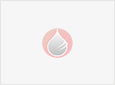
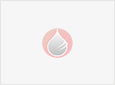
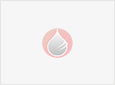
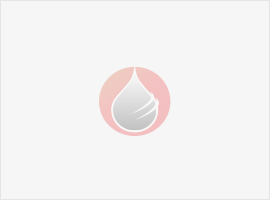
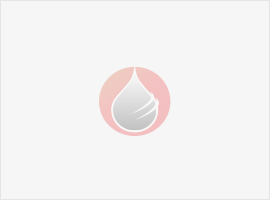
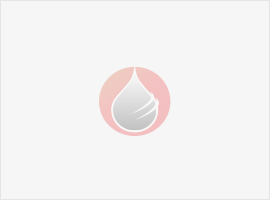
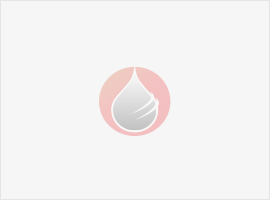
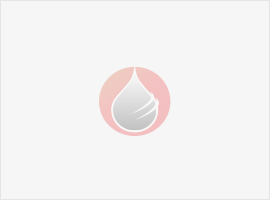
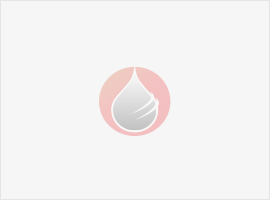
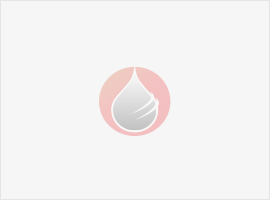
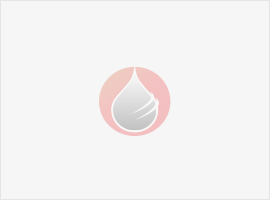
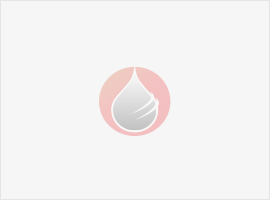
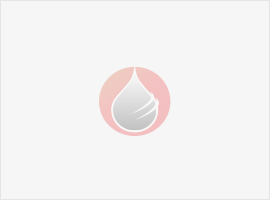
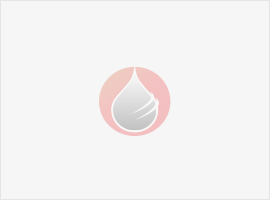
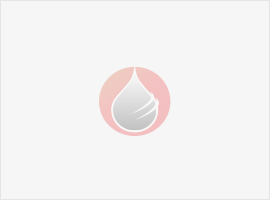
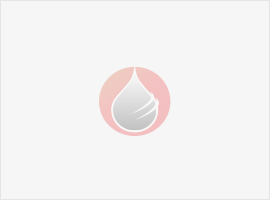
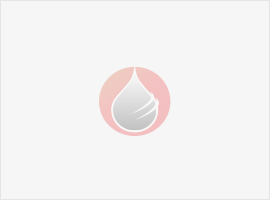
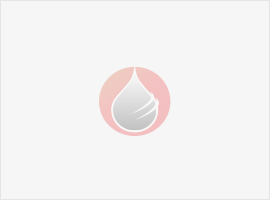
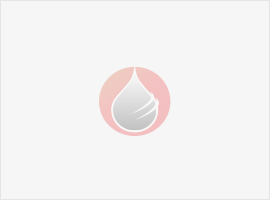
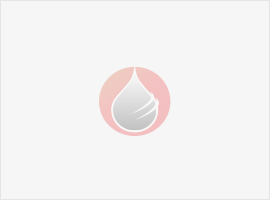
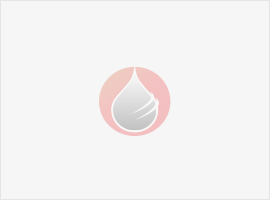
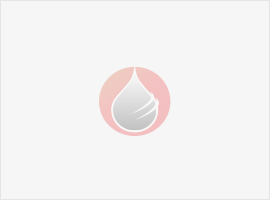
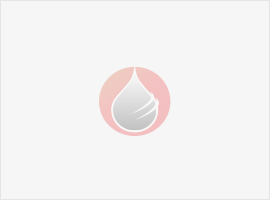
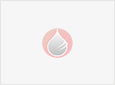
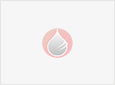
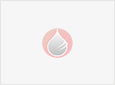
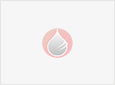
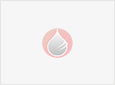
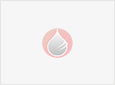
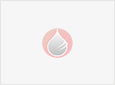
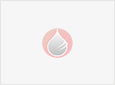
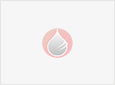
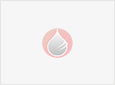
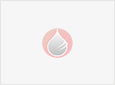
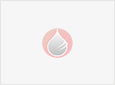
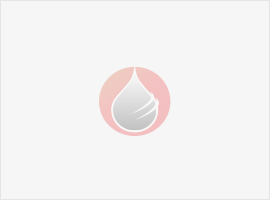
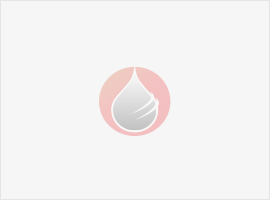
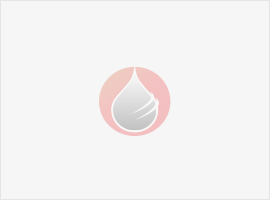
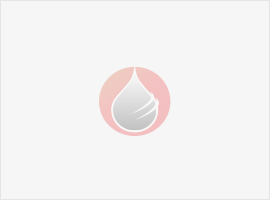
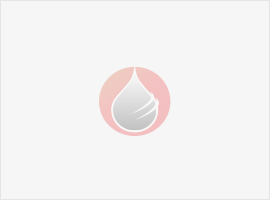
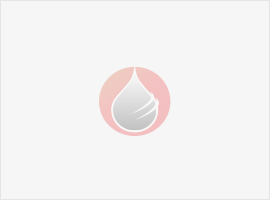
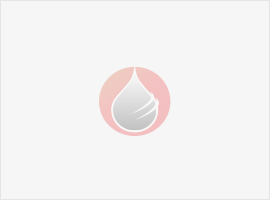
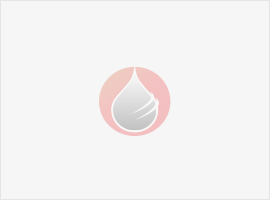
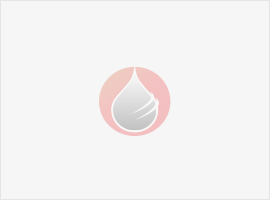
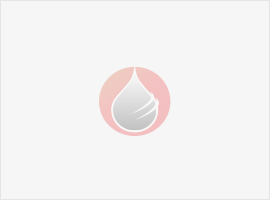
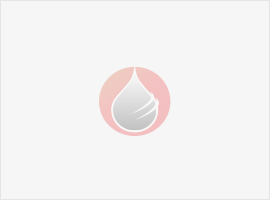
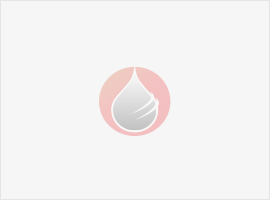
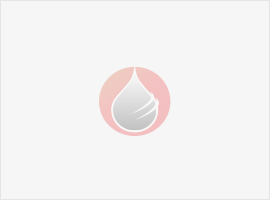
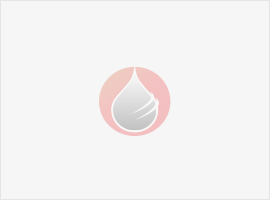
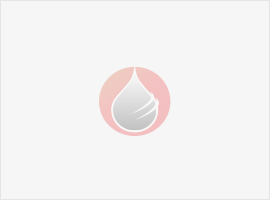
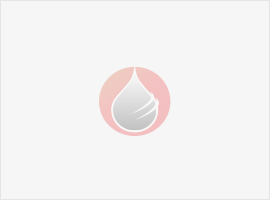
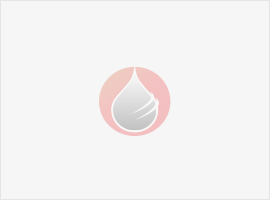
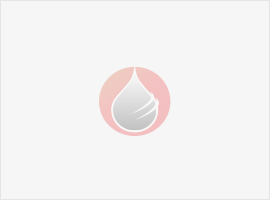
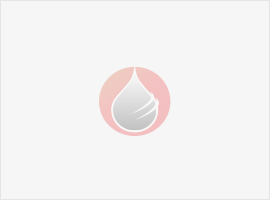
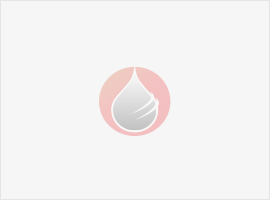
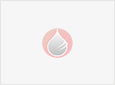
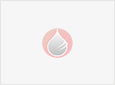
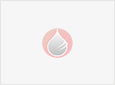
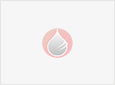
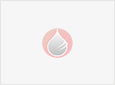
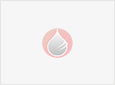
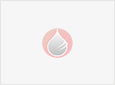
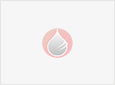
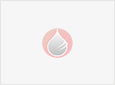

In [ ]:
import pandas as pd
import requests
URL = "https://oilprice.com/Latest-Energy-News/World-News/"
r = requests.get(URL)
print(r.content)
soup= BeautifulSoup(r.content, 'lxml')
print(soup.prettify)

In [ ]:
links=[]
output = set()

for a in soup.find(class_='tableGrid__column tableGrid__column--articleContent category').find_all('a', href=True):
  #print("Found the URL:", a['href'])
  links.append(a['href'])
  output.add(a['href'])
  #print(a.find(class_='categoryArticle__imageHolder'))

In [ ]:
output

{'https://oilprice.com/Latest-Energy-News/World-News/18-Of-EV-Drivers-In-California-Switched-Back-To-Gasoline-Cars.html',
 'https://oilprice.com/Latest-Energy-News/World-News/APICORP-Energy-Investment-In-MENA-Set-To-Top-800-Billion-By-2025.html',
 'https://oilprice.com/Latest-Energy-News/World-News/Angola-And-Zambia-Sign-5-Billion-Oil-Pipelines-Deal.html',
 'https://oilprice.com/Latest-Energy-News/World-News/Argentinas-Shale-Output-Set-To-Normalize-After-Roadblocks-Are-Lifted.html',
 'https://oilprice.com/Latest-Energy-News/World-News/Chesapeake-Considering-Texas-Asset-Sale.html',
 'https://oilprice.com/Latest-Energy-News/World-News/China-Gas-Demand-Set-To-Accelerate.html',
 'https://oilprice.com/Latest-Energy-News/World-News/EIA-Jet-Fuel-Demand-Is-On-The-Mend.html',
 'https://oilprice.com/Latest-Energy-News/World-News/Indias-COVID-Crisis-Hits-LNG-Demand.html',
 'https://oilprice.com/Latest-Energy-News/World-News/Iran-Aims-To-Raise-Oil-Exports-To-25-Million-Bpd-Once-US-Sanctions-Are-Li

In [ ]:
links=links[1::2]

In [ ]:
links

['https://oilprice.com/Latest-Energy-News/World-News/APICORP-Energy-Investment-In-MENA-Set-To-Top-800-Billion-By-2025.html',
 'https://oilprice.com/Latest-Energy-News/World-News/Venezuelas-Oil-Exports-Hover-Around-700000-Bpd.html',
 'https://oilprice.com/Latest-Energy-News/World-News/Iraq-May-Buy-Exxons-Stake-In-Major-Iraqi-Oilfield.html',
 'https://oilprice.com/Latest-Energy-News/World-News/Iran-Aims-To-Raise-Oil-Exports-To-25-Million-Bpd-Once-US-Sanctions-Are-Lifted.html',
 'https://oilprice.com/Latest-Energy-News/World-News/Indias-COVID-Crisis-Hits-LNG-Demand.html',
 'https://oilprice.com/Latest-Energy-News/World-News/Venezuela-Releases-Citgo-Oil-Executives-From-Jail-To-House-Arrest.html',
 'https://oilprice.com/Latest-Energy-News/World-News/18-Of-EV-Drivers-In-California-Switched-Back-To-Gasoline-Cars.html',
 'https://oilprice.com/Latest-Energy-News/World-News/China-Gas-Demand-Set-To-Accelerate.html',
 'https://oilprice.com/Latest-Energy-News/World-News/Argentinas-Shale-Output-Set-

In [ ]:
for pp in soup.find(class_='tableGrid__column tableGrid__column--articleContent category', text=re.compile("")).find_all('a'):
  print(pp)

AttributeError: ignored

In [ ]:
import pandas as pd
import requests
def get_links(link):
  URL = link
  r = requests.get(URL)
  #print(r.content)
  soup= BeautifulSoup(r.content, 'lxml')
  #print(soup.prettify)

  #soup = BeautifulSoup(r.content, 'lxml')
  news_content=[]
  news_content_list=[]
  #soup.find(class_='wysiwyg clear').text
  for pp in soup.find(class_='wysiwyg clear').find_all('p'):
    print(pp.text)
    news_content.append(pp.text)
  #news_content
  #print(" ".join(news_content))
  news_content_list=" ".join(news_content)  
  return news_content_list

In [ ]:

list1=[]
for link in links:
  extracted_text=get_links(link)
  list1.append(extracted_text)
  #df=pd.DataFrame()
  #df2=df.append([extracted_text], ignore_index=True)



Energy investments in Europe, the Middle East, and Africa are set to exceed $805 billion over the next five years, according to Saudi Arabia’s Arab Petroleum Investments Corporation.
This is $13 billion more than the energy investments APICORP estimated will flow into MENA between 2021 and 2025 in its previous five-year outlook, published in 2020.
The company based its updated forecast on four things. First, there is renewed optimism about the global economy. Second, APICORP, like most other forecasters, expects a boost in energy demand stemming from the improved global economic outlook.

In addition to these developments, APICORP named Libya as a driver behind higher MENA energy investments, noting some $10 billion of the total investment volume are likely to go into the North African country’s oil and gas industry.
Growth in renewable generation capacity is the third factor that APICORP identified in its report as determining the increase in energy investments across the MENA region.

AttributeError: ignored

In [ ]:
list1

['Energy investments in Europe, the Middle East, and Africa are set to exceed $805 billion over the next five years, according to Saudi Arabia’s Arab Petroleum Investments Corporation. This is $13 billion more than the energy investments APICORP estimated will flow into MENA between 2021 and 2025 in its previous five-year outlook, published in 2020. The company based its updated forecast on four things. First, there is renewed optimism about the global economy. Second, APICORP, like most other forecasters, expects a boost in energy demand stemming from the improved global economic outlook.\n In addition to these developments, APICORP named Libya as a driver behind higher MENA energy investments, noting some $10 billion of the total investment volume are likely to go into the North African country’s oil and gas industry. Growth in renewable generation capacity is the third factor that APICORP identified in its report as determining the increase in energy investments across the MENA regi

In [ ]:
df2=pd.DataFrame(list1, columns=['text'])

In [ ]:
df2

,text
0,"Energy investments in Europe, the Middle East,..."
1,Venezuela’s oil exports are hanging tough arou...
2,Iraq could buy ExxonMobil’s 32.7-percent stake...
3,Iran will be able to raise its crude oil expor...
4,Signs have already started to emerge that Indi...
5,Venezuela has released from jail the six U.S. ...
6,Close to a fifth of all EV drivers in Californ...
7,China’s domestic natural gas demand is set to ...
8,Healthcare workers who had blocked for three w...
9,U.S jet fuel demand is rising along with an in...


b'<!DOCTYPE html>\n<html lang="en">\n<head>\n<meta name="viewport" content="width=device-width, initial-scale=1">\n\t<title>APICORP: Energy Investment In MENA Set To Top $800 Billion By 2025 | OilPrice.com</title>\n\t<meta http-equiv="Content-Type" content="text/html; charset=utf-8"/>\n\t<meta name="description" content="Energy investments in Europe, the Middle East, and Africa are set to exceed $805 billion over the next five years, according to Saudi Arabia\xe2\x80\x99s Arab Petroleum Investments Corporation"/>\n\t<meta name="msvalidate.01" content="D14A5D573CE72469797ECB50683F1795"/>\n\t<meta name="robots" content="noodp, noydir"/>\n\t<meta name="news_keywords" content="Energy, Investment, MENA, Power Generation, Oil, Gas, Renewables, Saudi Arabia"/>\n\t<meta name="keywords" content="Energy, Investment, MENA, Power Generation, Oil, Gas, Renewables, Saudi Arabia"/>\n\t\t\n\t<link rel="amphtml" href="https://oilprice.com/Latest-Energy-News/World-News/APICORP-Energy-Investment-In-MENA-
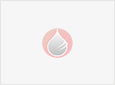
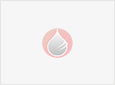
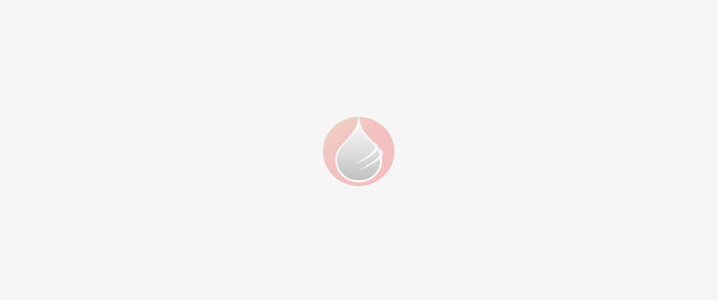
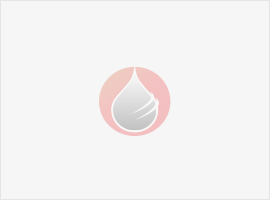
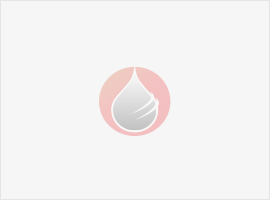
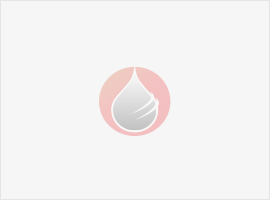
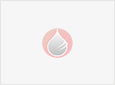
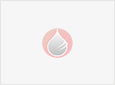
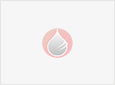
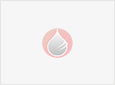
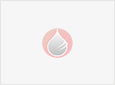
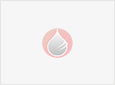
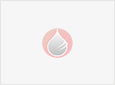
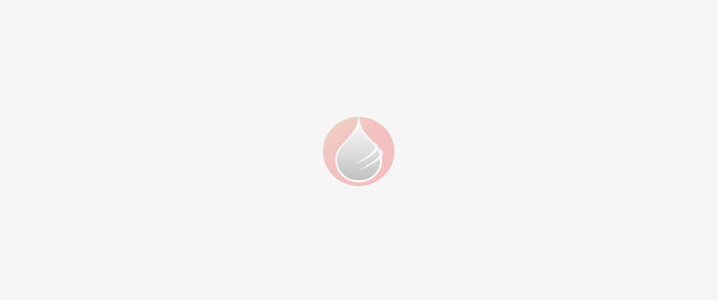
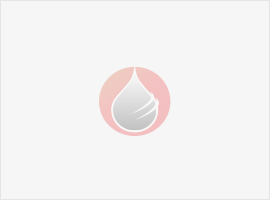
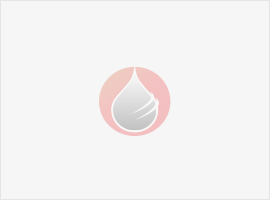
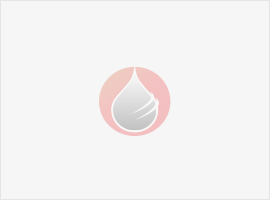
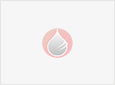
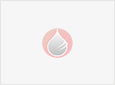
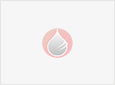
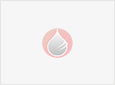
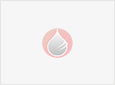

In [ ]:
import pandas as pd
import requests
URL = "https://oilprice.com/Latest-Energy-News/World-News/APICORP-Energy-Investment-In-MENA-Set-To-Top-800-Billion-By-2025.html"
r = requests.get(URL)
print(r.content)
soup= BeautifulSoup(r.content, 'lxml')
print(soup.prettify)

soup = BeautifulSoup(r.content, 'lxml')
news_content=[]
#soup.find(class_='wysiwyg clear').text
for pp in soup.find(class_='wysiwyg clear').find_all('p'):
  print(pp.text)
  news_content.append(pp.text)
news_content
print(" ".join(news_content))
news_content=" ".join(news_content)

In [ ]:
news_content

'Energy investments in Europe, the Middle East, and Africa are set to exceed $805 billion over the next five years, according to Saudi Arabia’s Arab Petroleum Investments Corporation. This is $13 billion more than the energy investments APICORP estimated will flow into MENA between 2021 and 2025 in its previous five-year outlook, published in 2020. The company based its updated forecast on four things. First, there is renewed optimism about the global economy. Second, APICORP, like most other forecasters, expects a boost in energy demand stemming from the improved global economic outlook.\n In addition to these developments, APICORP named Libya as a driver behind higher MENA energy investments, noting some $10 billion of the total investment volume are likely to go into the North African country’s oil and gas industry. Growth in renewable generation capacity is the third factor that APICORP identified in its report as determining the increase in energy investments across the MENA regio

In [ ]:
news_content

'Energy investments in Europe, the Middle East, and Africa are set to exceed $805 billion over the next five years, according to Saudi Arabia’s Arab Petroleum Investments Corporation. This is $13 billion more than the energy investments APICORP estimated will flow into MENA between 2021 and 2025 in its previous five-year outlook, published in 2020. The company based its updated forecast on four things. First, there is renewed optimism about the global economy. Second, APICORP, like most other forecasters, expects a boost in energy demand stemming from the improved global economic outlook.\n In addition to these developments, APICORP named Libya as a driver behind higher MENA energy investments, noting some $10 billion of the total investment volume are likely to go into the North African country’s oil and gas industry. Growth in renewable generation capacity is the third factor that APICORP identified in its report as determining the increase in energy investments across the MENA regio

In [ ]:
df=pd.DataFrame([news_content])
df[0][0]

'Energy investments in Europe, the Middle East, and Africa are set to exceed $805 billion over the next five years, according to Saudi Arabia’s Arab Petroleum Investments Corporation. This is $13 billion more than the energy investments APICORP estimated will flow into MENA between 2021 and 2025 in its previous five-year outlook, published in 2020. The company based its updated forecast on four things. First, there is renewed optimism about the global economy. Second, APICORP, like most other forecasters, expects a boost in energy demand stemming from the improved global economic outlook.\n In addition to these developments, APICORP named Libya as a driver behind higher MENA energy investments, noting some $10 billion of the total investment volume are likely to go into the North African country’s oil and gas industry. Growth in renewable generation capacity is the third factor that APICORP identified in its report as determining the increase in energy investments across the MENA regio

In [ ]:
match = soup.find('div', class_="news_content")
table_news_content = soup.find('div', attrs = {'id':'news-content'})

In [ ]:
for o in table_news_content:
  fan=o
  if
  print(o)


In [ ]:
print(table_news_content.prettify())

In [ ]:
soup = BeautifulSoup(r.content, 'lxml')
#soup.find(class_='wysiwyg clear').text
for pp in soup.find(class_='wysiwyg clear').find_all('p'):
  print(pp.text)

AttributeError: ignored

NameError: ignored

In [ ]:
#table_news_content.p.text
table_news_content.find('p').getText() # gets single line



'Energy investments in Europe, the Middle East, and Africa are set to exceed $805 billion over the next five years, according to Saudi Arabia’s Arab Petroleum Investments Corporation.'

In [ ]:
a=table_news_content.find_all('p')


table = soup.find('div',attrs={'id':'news-content'})
print(table)
for x in table:
  print(x.find('p'))
#print(a)
#s = str(a).replace('<p>', '')

<div class="wysiwyg clear" id="news-content">
<!DOCTYPE html PUBLIC "-//W3C//DTD HTML 4.0 Transitional//EN" "http://www.w3.org/TR/REC-html40/loose.dtd">

<p>Energy investments in Europe, the Middle East, and Africa are set to exceed $805 billion over the next five years, according to Saudi Arabia’s Arab Petroleum Investments Corporation.</p><p>This is $13 billion more than the energy investments APICORP <a href="https://www.apicorp.org/apicorp-mena-energy-investments-to-exceed-usd805-bn-over-next-five-years">estimated</a> will flow into MENA between 2021 and 2025 in its previous five-year outlook, published in 2020.</p><p>The company based its updated forecast on four things. First, there is renewed optimism about the global economy. Second, APICORP, like most other forecasters, expects a boost in energy demand stemming from the improved global economic outlook.<!-- /192633929/OilPrice-300x250-ATF-Mobile -->
</p><div class="mobile-only" id="div-gpt-ad-1555424664620-0" style="text-align

In [ ]:
print(table_news_content.prettify())

<div class="wysiwyg clear" id="news-content">
 <!DOCTYPE html PUBLIC "-//W3C//DTD HTML 4.0 Transitional//EN" "http://www.w3.org/TR/REC-html40/loose.dtd">
 <p>
  Energy investments in Europe, the Middle East, and Africa are set to exceed $805 billion over the next five years, according to Saudi Arabia’s Arab Petroleum Investments Corporation.
 </p>
 <p>
  This is $13 billion more than the energy investments APICORP
  <a href="https://www.apicorp.org/apicorp-mena-energy-investments-to-exceed-usd805-bn-over-next-five-years">
   estimated
  </a>
  will flow into MENA between 2021 and 2025 in its previous five-year outlook, published in 2020.
 </p>
 <p>
  The company based its updated forecast on four things. First, there is renewed optimism about the global economy. Second, APICORP, like most other forecasters, expects a boost in energy demand stemming from the improved global economic outlook.
  <!-- /192633929/OilPrice-300x250-ATF-Mobile -->
 </p>
 <div class="mobile-only" id="div-gpt-ad

In [ ]:
from bs4 import BeautifulSoup
import requests
import re
def url_to_string(url):
    res = requests.get(url)
    html = res.text
    soup = BeautifulSoup(html, 'html5lib')
    for script in soup(["script", "style", 'aside']):
        script.extract()
    return " ".join(re.split(r'[\n\t]+', soup.get_text()))
ny_bb = url_to_string('https://oilprice.com/Latest-Energy-News/World-News/APICORP-Energy-Investment-In-MENA-Set-To-Top-800-Billion-By-2025.html')
article = nlp(ny_bb)
len(article.ents)

324

In [ ]:
article

NameError: ignored

In [ ]:
from collections import Counter
labels = [x.label_ for x in article.ents]
Counter(labels)

Counter({'CARDINAL': 5,
         'DATE': 22,
         'FAC': 1,
         'GPE': 10,
         'NORP': 4,
         'ORDINAL': 1,
         'ORG': 38,
         'PERSON': 87,
         'WORK_OF_ART': 3})

In [ ]:
str(sentences)

NameError: ignored

In [ ]:
from spacy import displacy
sentences = [x for x in article.sents]
displacy.render(nlp(str(sentences)), jupyter=True, style='ent')

In [ ]:
doc = nlp(u'My sister has a dog. She loves him')

doc._.coref_clusters


In [ ]:
doc._.coref_clusters[1].mentions


In [ ]:
doc._.coref_clusters[1].mentions[-1]


In [ ]:

doc._.coref_clusters[1].mentions[-1]._.coref_cluster.main

In [ ]:
newstring=[]

In [ ]:
for i in doc.sents:
  print(i.string.strip()) #strip removes any spaces from the string
  print(type(i))

In [ ]:
doc=nlp('fjdsfkl ef dfd. Shsahazbe is aneice. How are you ')

In [ ]:
z=[sent.string.strip() for sent in doc.sents]

In [ ]:
z

In [ ]:
doc = nlp("Give it back he said. He is very bad")
span = doc[1:3]

In [ ]:
doc.text

In [ ]:
doc[0]

In [ ]:
doc = nlp("Give it back! He pleaded.")
token = doc[0]
print(token)

In [ ]:
assert token.text == "Give"

In [ ]:
from spacy.tokens import Doc

words = ["hello", "world", "!","a"]
spaces = [True, False, True, False]
doc = Doc(nlp.vocab, words=words, spaces=spaces)

In [ ]:
doc.sents

In [ ]:
article._.coref_resolved

In [ ]:
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [ ]:
from textblob import TextBlob
number=0
df3=pd.DataFrame()
for text in range(0,len(df2)):
  blob= TextBlob(df2.loc[number,'text'])    
  number+=1
  sum=0
  for sentence in blob.sentences:
    #print(sentence.sentiment.polarity)
    sum=sum+sentence.sentiment.polarity
  print(" The " + str(number) +"Article sentiment is:"+ str(sum))

 The 1Article sentiment is:0.8004040404040403
 The 2Article sentiment is:-0.555429292929293
 The 3Article sentiment is:0.119534632034632
 The 4Article sentiment is:1.0218749999999999
 The 5Article sentiment is:0.06312710437710434
 The 6Article sentiment is:0.35119047619047616
 The 7Article sentiment is:1.1848484848484848
 The 8Article sentiment is:2.4291666666666667
 The 9Article sentiment is:0.7919444444444445
 The 10Article sentiment is:0.873611111111111
 The 11Article sentiment is:0.4483766233766233
 The 12Article sentiment is:1.754570707070707
 The 13Article sentiment is:0.9850198412698414
 The 14Article sentiment is:1.2333333333333334
 The 15Article sentiment is:2.3199007936507936
 The 16Article sentiment is:-0.8320476190476189
 The 17Article sentiment is:0.7390151515151515
 The 18Article sentiment is:2.038005050505051
 The 19Article sentiment is:0.6441326530612245
 The 20Article sentiment is:-0.01880952380952383


In [ ]:
number=0
pairs=pd.DataFrame()
for m in range(0,len(df2)):
  pair = get_entity_pairs(df2.loc[number,'text'])
  number=number+1
  pairs=pairs.append(pair)

Entity pairs extracted: 1
Entity pairs extracted: 2
Entity pairs extracted: 3
Entity pairs extracted: 2
Entity pairs extracted: 0
Entity pairs extracted: 1
Entity pairs extracted: 0
Entity pairs extracted: 1
Entity pairs extracted: 1
Entity pairs extracted: 2
Entity pairs extracted: 2
Entity pairs extracted: 1
Entity pairs extracted: 2
Entity pairs extracted: 1
Entity pairs extracted: 2
Entity pairs extracted: 0
Entity pairs extracted: 0
Entity pairs extracted: 2
Entity pairs extracted: 1
Entity pairs extracted: 1


In [ ]:
pairs

,subject,relation,object,subject_type,object_type
0,APICORP,expects,boost,ORG,NOUN_CHUNK
0,Venezuela,shipped,average,GPE,NOUN_CHUNK
1,"One of an average of 688,533 bpd of crude oil ...",made,way,CARDINAL,NOUN_CHUNK
0,Iraq,buy,ExxonMobil’s 32.7-percent stake,GPE,ORG
1,Bloomberg,quoted,Iraq’s oil minister Ihsan Abdul Jabbar Ismaael,PERSON,GPE
2,Reports,are,U.S. stake,NOUN_CHUNK,GPE
0,Iran,boosted,Iran crude oil production,GPE,GPE
1,the United States National Security Advisor,told,ABC News,ORG,ORG
0,Venezuela,arrested,U.S. executives,GPE,NOUN_CHUNK
0,China demand,hit,350-356 billion cubic meters,GPE,CARDINAL


In [ ]:
def get_entity_pairs(text, coref=True):
    # preprocess text
    text = re.sub(r'\n+', '.', text)  # replace multiple newlines with period
    text = re.sub(r'\[\d+\]', ' ', text)  # remove reference numbers
    text = nlp(text)
    if coref:
        text = nlp(text._.coref_resolved)  # resolve coreference clusters
    
    def filter_spans(spans):
    # Filter a sequence of spans so they don't contain overlaps
    # For spaCy 2.1.4+: this function is available as spacy.util.filter_spans()
      get_sort_key = lambda span: (span.end - span.start, -span.start)
      sorted_spans = sorted(spans, key=get_sort_key, reverse=True)
      result = []
      seen_tokens = set()
      for span in sorted_spans:
          # Check for end - 1 here because boundaries are inclusive
          if span.start not in seen_tokens and span.end - 1 not in seen_tokens:
              result.append(span)
          seen_tokens.update(range(span.start, span.end))
      result = sorted(result, key=lambda span: span.start)
      return result

    def refine_ent(ent, sent):
        unwanted_tokens = (
            'PRON',  # pronouns
            'PART',  # particle
            'DET',  # determiner
            'SCONJ',  # subordinating conjunction
            'PUNCT',  # punctuation
            'SYM',  # symbol
            'X',  # other
        )
        ent_type = ent.ent_type_  # get entity type
        if ent_type == '':
            ent_type = 'NOUN_CHUNK'
            ent = ' '.join(str(t.text) for t in
                           nlp(str(ent)) if t.pos_
                           not in unwanted_tokens and t.is_stop == False)
        elif ent_type in ('NOMINAL', 'CARDINAL', 'ORDINAL') and str(ent).find(' ') == -1:
            refined = ''
            for i in range(len(sent) - ent.i):
                if ent.nbor(i).pos_ not in ('VERB', 'PUNCT'):
                    refined += ' ' + str(ent.nbor(i))
                else:
                    ent = refined.strip()
                    break

        return ent, ent_type

    sentences = [sent.string.strip() for sent in text.sents]  # split text into sentences
    ent_pairs = []
    for sent in sentences:
        sent = nlp(sent)
        spans = list(sent.ents) + list(sent.noun_chunks)  # collect nodes
        spans = filter_spans(spans)
        with sent.retokenize() as retokenizer:
            [retokenizer.merge(span, attrs={'tag': span.root.tag,
                                            'dep': span.root.dep}) for span in spans]
        deps = [token.dep_ for token in sent]

        # limit our example to simple sentences with one subject and object
        if (deps.count('obj') + deps.count('dobj')) != 1\
                or (deps.count('subj') + deps.count('nsubj')) != 1:
            continue

        for token in sent:
            if token.dep_ not in ('obj', 'dobj'):  # identify object nodes
                continue
            subject = [w for w in token.head.lefts if w.dep_
                       in ('subj', 'nsubj')]  # identify subject nodes
            if subject:
                subject = subject[0]
                # identify relationship by root dependency
                relation = [w for w in token.ancestors if w.dep_ == 'ROOT']
                if relation:
                    relation = relation[0]
                    # add adposition or particle to relationship
                    if relation.nbor(1).pos_ in ('ADP', 'PART'):
                        relation = ' '.join((str(relation), str(relation.nbor(1))))
                else:
                    relation = 'unknown'

                subject, subject_type = refine_ent(subject, sent)
                token, object_type = refine_ent(token, sent)

                ent_pairs.append([str(subject), str(relation), str(token),
                                  str(subject_type), str(object_type)])

    ent_pairs = [sublist for sublist in ent_pairs
                          if not any(str(ent) == '' for ent in sublist)]
    pairs = pd.DataFrame(ent_pairs, columns=['subject', 'relation', 'object',
                                             'subject_type', 'object_type'])
    print('Entity pairs extracted:', str(len(ent_pairs)))

    return pairs


In [ ]:
wiki_data

,page,text,link,categories,topic
0,medicine,"Medicine is the art, science, and practice of ...",https://en.wikipedia.org/wiki/Medicine,"[All accuracy disputes, Articles containing La...",medicine
1,A Short History of Christianity,A Short History of Christianity is a non-ficti...,https://en.wikipedia.org/wiki/A_Short_History_...,"[2012 non-fiction books, Books by Geoffrey Bla...",medicine
2,Abdomen,"The abdomen (colloquially called the belly, tu...",https://en.wikipedia.org/wiki/Abdomen,"[Abdomen, All articles with unsourced statemen...",medicine
3,Access to medicines,Access to medicines refers to the reasonable a...,https://en.wikipedia.org/wiki/Access_to_medicines,[World Health Organization],medicine
4,Acute (medical),"In medicine, describing a disease as acute den...",https://en.wikipedia.org/wiki/Acute_(medicine),"[All articles with unsourced statements, Artic...",medicine
...,...,...,...,...,...
709,Category:Wikipedia articles with LCCN identifiers,Pages in this category should only be added by...,https://en.wikipedia.org/wiki/Category:Wikiped...,"[CatAutoTOC generates Large category TOC, Hidd...",medicine
710,Book:Medicine,== Medicine ==\nOverview\nMedicine\nHistory\nH...,https://en.wikipedia.org/wiki/Book:Medicine,"[Wikipedia books (community books), Wikipedia ...",medicine
711,Portal:Medicine,</references>,https://en.wikipedia.org/wiki/Portal:Medicine,"[All portals, All portals with triaged subpage...",medicine
712,Category:Wikipedia articles with NDL identifiers,Pages in this category should only be added by...,https://en.wikipedia.org/wiki/Category:Wikiped...,"[CatAutoTOC generates Large category TOC, Hidd...",medicine


In [ ]:
print(wiki_data['text'])

0      Medicine is the art, science, and practice of ...
1      A Short History of Christianity is a non-ficti...
2      The abdomen (colloquially called the belly, tu...
3      Access to medicines refers to the reasonable a...
4      In medicine, describing a disease as acute den...
                             ...                        
709    Pages in this category should only be added by...
710    == Medicine ==\nOverview\nMedicine\nHistory\nH...
711                                        </references>
712    Pages in this category should only be added by...
713    An X-ray, or X-radiation, is a penetrating for...
Name: text, Length: 703, dtype: object


In [ ]:
import pandas as pd
pairs=pd.DataFrame()

In [ ]:
i=len(wiki_data)
print(i)

703


In [ ]:
number=53
for m in range(0,len(wiki_data)):
  pair = get_entity_pairs(wiki_data.loc[number,'text'])
  number=number+1
  pairs=pairs.append(pair)



Entity pairs extracted: 0
Entity pairs extracted: 28
Entity pairs extracted: 7
Entity pairs extracted: 13
Entity pairs extracted: 6
Entity pairs extracted: 3
Entity pairs extracted: 37
Entity pairs extracted: 28
Entity pairs extracted: 1
Entity pairs extracted: 9
Entity pairs extracted: 32
Entity pairs extracted: 1
Entity pairs extracted: 29
Entity pairs extracted: 23
Entity pairs extracted: 4
Entity pairs extracted: 34
Entity pairs extracted: 9
Entity pairs extracted: 7
Entity pairs extracted: 9
Entity pairs extracted: 18
Entity pairs extracted: 14
Entity pairs extracted: 25
Entity pairs extracted: 29
Entity pairs extracted: 8
Entity pairs extracted: 7
Entity pairs extracted: 4
Entity pairs extracted: 11
Entity pairs extracted: 6
Entity pairs extracted: 29
Entity pairs extracted: 17
Entity pairs extracted: 6
Entity pairs extracted: 48
Entity pairs extracted: 11
Entity pairs extracted: 29
Entity pairs extracted: 38
Entity pairs extracted: 22
Entity pairs extracted: 8
Entity pairs extra

IndexError: ignored

In [ ]:
data=pairs.to_csv('KG_dataset.csv', index=False)

In [ ]:
pairs

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving KG_dataset_1_family_medicine.csv to KG_dataset_1_family_medicine.csv


In [ ]:
import pandas as pd

pairs=pd.read_csv("KG_dataset_1_family_medicine.csv")

In [ ]:
pairs

,subject,relation,object,subject_type,object_type
0,Family physicians,hold,M.D.,NOUN_CHUNK,NOUN_CHUNK
1,certification,requires,five years,NOUN_CHUNK,DATE
2,term Primary Care,include,services,NOUN_CHUNK,NOUN_CHUNK
3,Family physicians,deliver,range,NOUN_CHUNK,NOUN_CHUNK
4,family physicians,treat,patients,NOUN_CHUNK,NOUN_CHUNK
...,...,...,...,...,...
2302,the British Library,announced,support,ORG,NOUN_CHUNK
2303,process,reveal,errors,NOUN_CHUNK,NOUN_CHUNK
2304,publishers,provide,PDF,NOUN_CHUNK,NOUN_CHUNK
2305,system,provides,search capability,NOUN_CHUNK,NOUN_CHUNK


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt


def draw_kg(pairs):
    k_graph = nx.from_pandas_edgelist(pairs, 'subject', 'object',
            create_using=nx.MultiDiGraph())
    node_deg = nx.degree(k_graph)
    layout = nx.spring_layout(k_graph, k=0.15, iterations=20)
    plt.figure(num=None, figsize=(120, 90), dpi=80)
    nx.draw_networkx(
        k_graph,
        node_size=[int(deg[1]) * 500 for deg in node_deg],
        arrowsize=20,
        linewidths=1.5,
        pos=layout,
        edge_color='red',
        edgecolors='black',
        node_color='white',
        )
    labels = dict(zip(list(zip(pairs.subject, pairs.object)),
                  pairs['relation'].tolist()))
    nx.draw_networkx_edge_labels(k_graph, pos=layout, edge_labels=labels,
                                 font_color='red')
    plt.axis('off')
    plt.show()

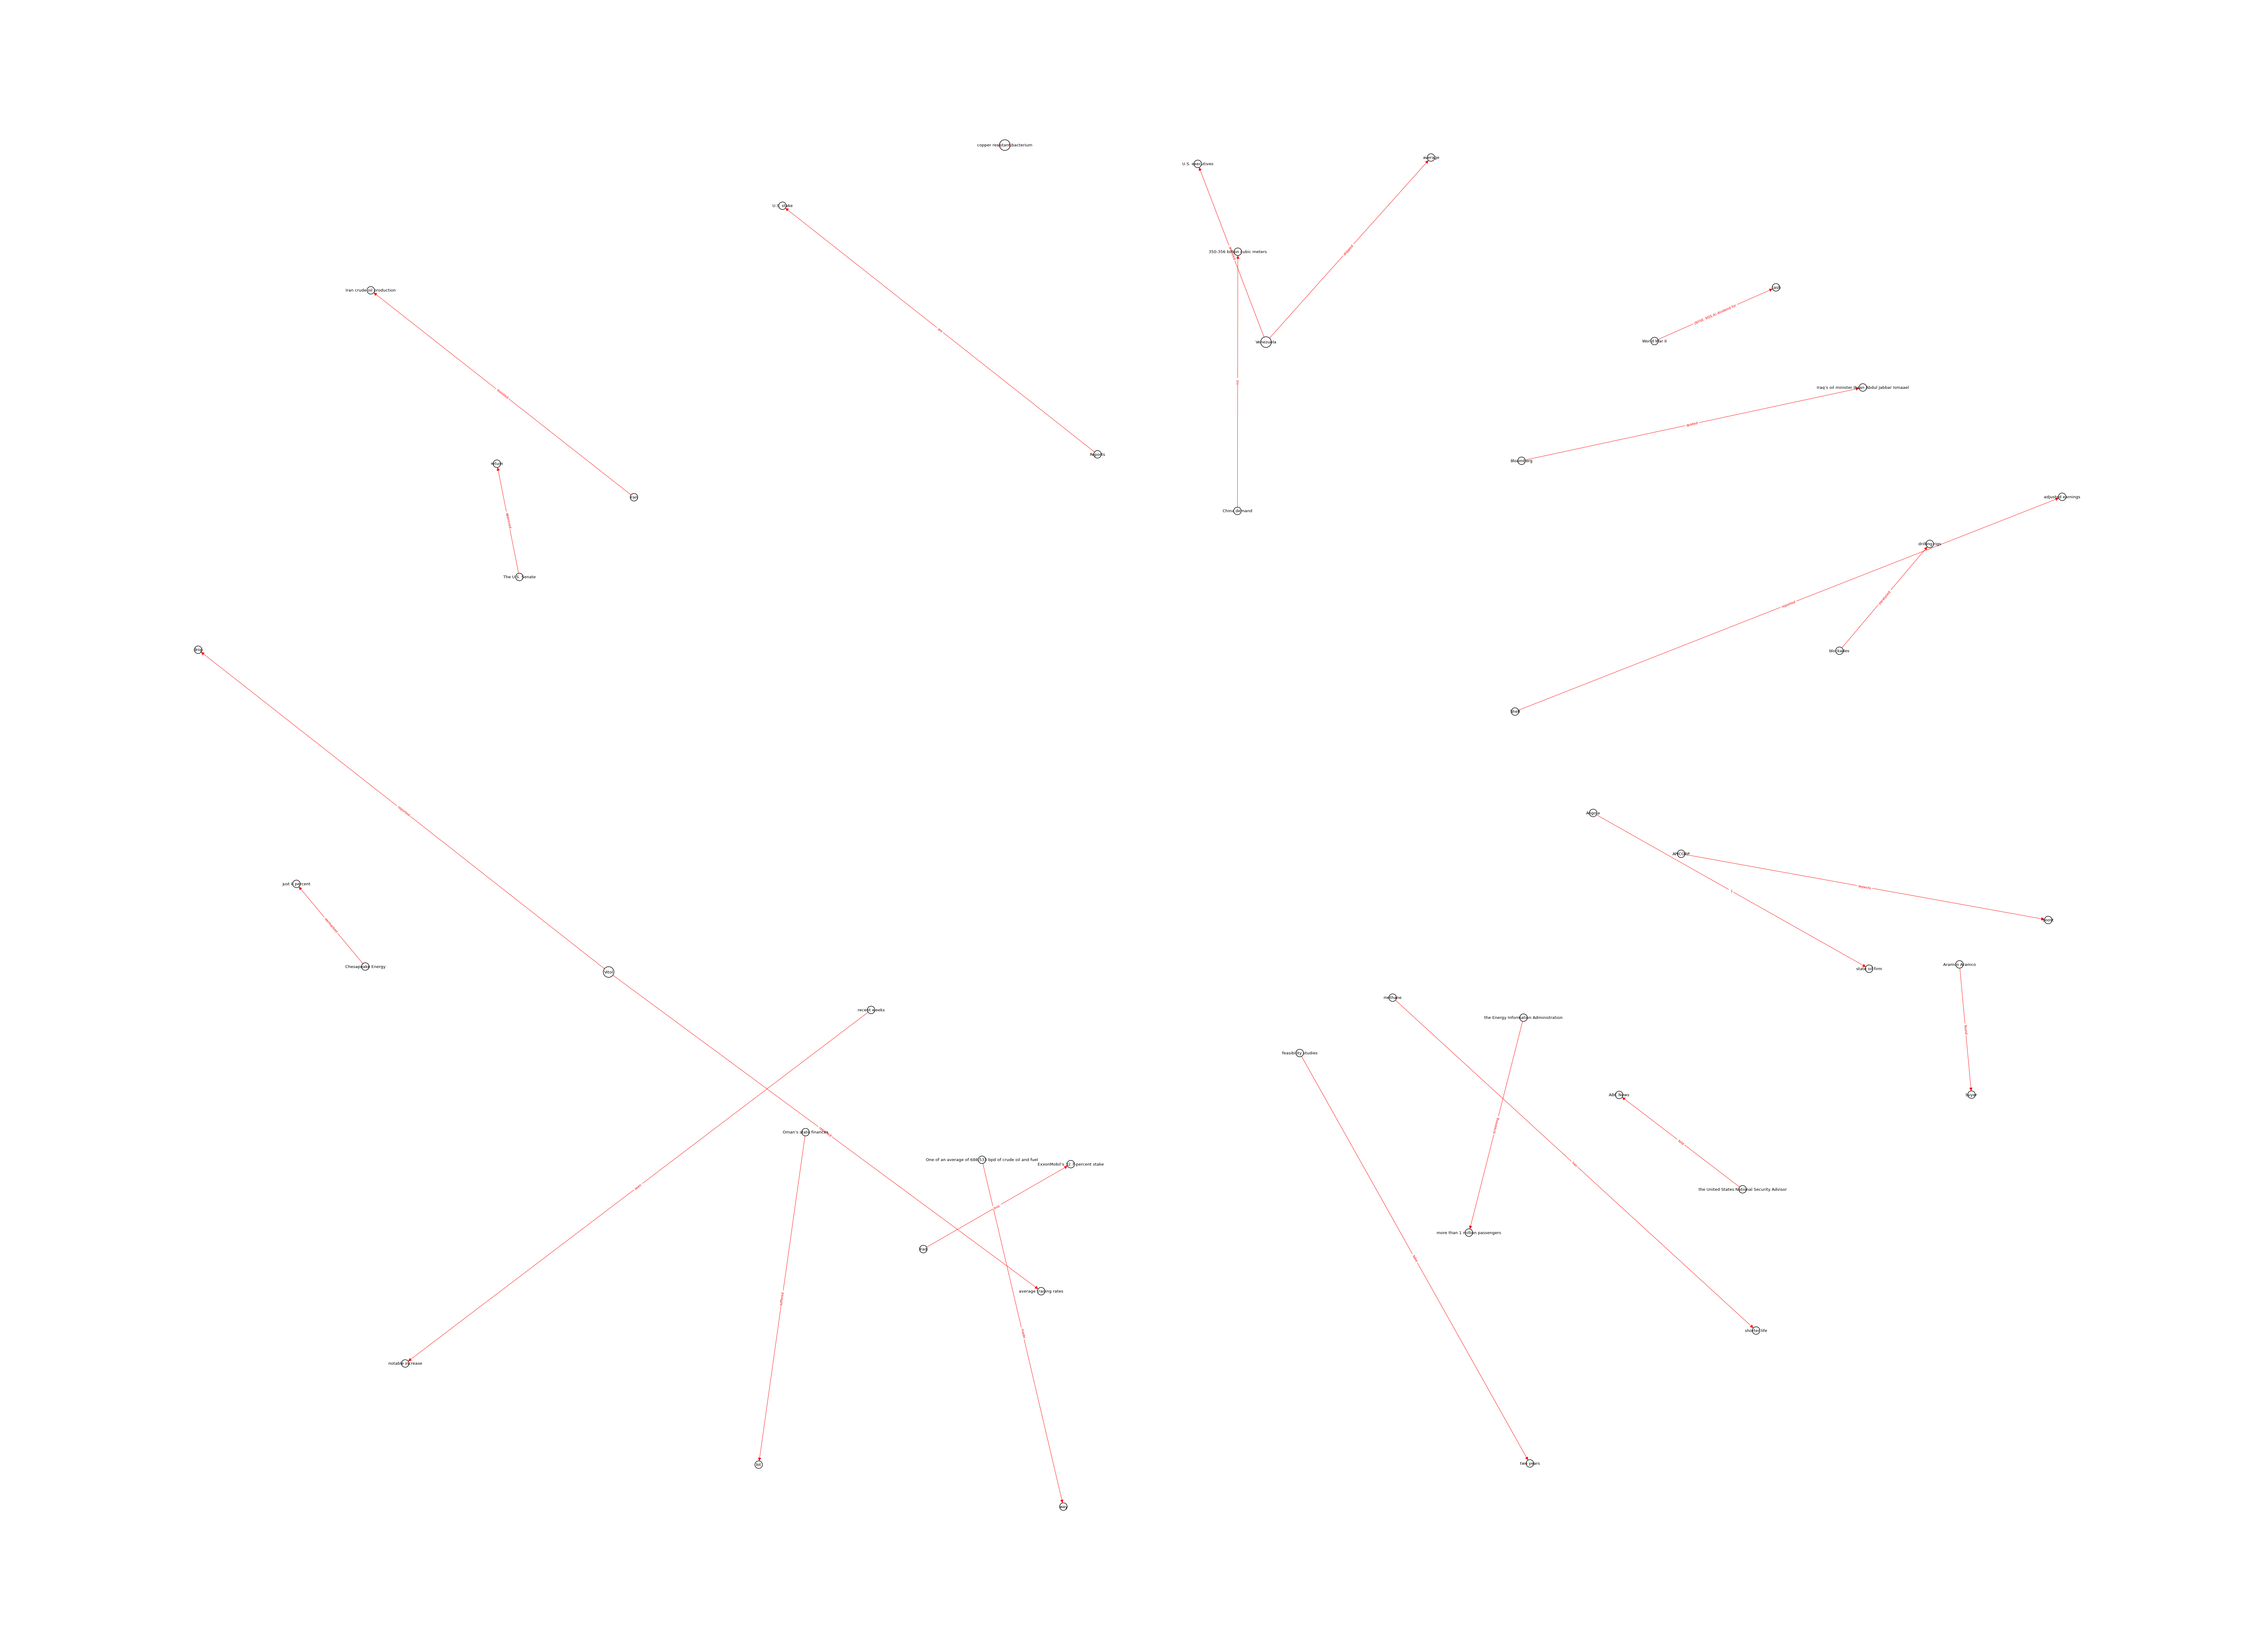

In [ ]:
draw_kg(pairs)

Applying the subject to input and exporting object to target

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
pairs["object_code"] = lb_make.fit_transform(pairs["object"])
input=pairs['subject']
target=pairs['object_code']

In [ ]:
pairs

,subject,relation,object,subject_type,object_type,object_code
0,Family physicians,hold,M.D.,NOUN_CHUNK,NOUN_CHUNK,211
1,certification,requires,five years,NOUN_CHUNK,DATE,843
2,term Primary Care,include,services,NOUN_CHUNK,NOUN_CHUNK,1556
3,Family physicians,deliver,range,NOUN_CHUNK,NOUN_CHUNK,1463
4,family physicians,treat,patients,NOUN_CHUNK,NOUN_CHUNK,1344
...,...,...,...,...,...,...
2302,the British Library,announced,support,ORG,NOUN_CHUNK,1680
2303,process,reveal,errors,NOUN_CHUNK,NOUN_CHUNK,790
2304,publishers,provide,PDF,NOUN_CHUNK,NOUN_CHUNK,263
2305,system,provides,search capability,NOUN_CHUNK,NOUN_CHUNK,1540


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(input, target, test_size=0.3)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect=CountVectorizer()
#count_vect2=CountVectorizer()
#count_vect3=CountVectorizer()

counts=count_vect.fit_transform(X_train)
counts_test=count_vect.transform(X_test)

In [ ]:
print(counts)

  (0, 904)	1
  (0, 804)	1
  (0, 1012)	1
  (0, 906)	3
  (0, 503)	3
  (0, 121)	2
  (0, 403)	1
  (0, 448)	1
  (0, 372)	1
  (1, 925)	1
  (1, 477)	1
  (2, 993)	1
  (2, 629)	1
  (3, 50)	1
  (3, 1423)	1
  (3, 1343)	1
  (3, 778)	1
  (3, 316)	1
  (4, 704)	1
  (5, 953)	1
  (5, 1249)	1
  (6, 1492)	1
  (7, 1248)	1
  (8, 258)	1
  (8, 361)	1
  :	:
  (1598, 1377)	1
  (1599, 1212)	1
  (1599, 760)	1
  (1600, 1308)	1
  (1601, 880)	1
  (1601, 1198)	1
  (1602, 1365)	1
  (1603, 1216)	1
  (1604, 1260)	1
  (1604, 293)	1
  (1605, 1028)	1
  (1606, 916)	1
  (1606, 117)	1
  (1607, 1135)	1
  (1608, 202)	1
  (1609, 977)	1
  (1610, 988)	1
  (1610, 996)	1
  (1610, 667)	1
  (1610, 600)	1
  (1610, 1442)	1
  (1611, 1388)	1
  (1611, 65)	1
  (1612, 1448)	1
  (1613, 475)	1


In [ ]:
print(counts_test)

  (0, 850)	1
  (0, 935)	1
  (1, 1349)	1
  (2, 1404)	1
  (3, 531)	1
  (3, 988)	1
  (4, 610)	1
  (4, 1307)	1
  (5, 188)	1
  (5, 1214)	1
  (7, 919)	1
  (7, 978)	1
  (8, 635)	1
  (8, 1403)	1
  (8, 1448)	1
  (9, 67)	1
  (11, 454)	1
  (11, 1216)	1
  (12, 259)	1
  (12, 1126)	1
  (13, 1367)	1
  (14, 1066)	1
  (15, 1461)	1
  (17, 674)	1
  (17, 1174)	1
  :	:
  (673, 733)	1
  (674, 906)	1
  (674, 1350)	1
  (675, 463)	1
  (676, 1370)	1
  (678, 342)	1
  (680, 503)	1
  (680, 906)	1
  (680, 1143)	1
  (680, 1451)	1
  (682, 1350)	1
  (683, 477)	1
  (685, 635)	1
  (685, 1403)	1
  (685, 1448)	1
  (688, 210)	1
  (688, 549)	1
  (688, 733)	1
  (688, 959)	1
  (688, 1012)	1
  (688, 1403)	1
  (689, 174)	1
  (691, 638)	1
  (691, 1115)	1
  (692, 1146)	1


In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

nb.fit(counts, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
counts_test.shape

(693, 1526)

In [ ]:
print("-----------"*10)
print("For Multinomial Naive Bayers Classifier for Continuous Bag of Words (CBOW)")
print("Accuracy for NB after applying CountVector:", nb.score(counts_test, y_test))


--------------------------------------------------------------------------------------------------------------
For Multinomial Naive Bayers Classifier for Continuous Bag of Words (CBOW)
Accuracy for NB after applying CountVector: 0.025974025974025976


In [ ]:
y_pred=nb.predict(counts_test)
from sklearn.metrics import confusion_matrix,f1_score,recall_score,accuracy_score,classification_report
confusion_matrix(y_test, y_pred)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
f1_score(y_test,y_pred, average="macro" )

0.004047353733624541

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=1000,max_depth=50, bootstrap=True, max_features='sqrt')
clf.fit(counts, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=100, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred=clf.predict(counts_test)

In [ ]:
print("-----------"*10)
print("For Random Forest Classifier for Continuous Bag of Words (CBOW)")
print("The accuracy for RandomForest Classifier is :", accuracy_score(y_test, y_pred))
print("The F1-Score for RandomForest Classifier is :", f1_score(y_test,y_pred, average="macro" ))


--------------------------------------------------------------------------------------------------------------
For Random Forest Classifier for Continuous Bag of Words (CBOW)
The accuracy for RandomForest Classifier is : 0.03751803751803752
The F1-Score for RandomForest Classifier is : 0.012589606348076456


In [ ]:
#!git clone https://github.com/huggingface/neuralcoref.git

In [ ]:
#!pip install -r requirements.txt
#!pip install -e .


In [ ]:
draw_kg(pairs)

In [ ]:
#!pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.2.0/en_core_web_sm-2.2.0.tar.gz

In [ ]:
#pip install colorama